In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model 
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np 
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = r'C:\Users\ThireshSidda\Tensorflow_Tut\TransferLearning\dataset\training_set'
test_path = r'C:\Users\ThireshSidda\Tensorflow_Tut\TransferLearning\dataset\test_set'

In [4]:
# VGG16 model for image classification with weights trained on ImageNet
# we have to use image size of 224, 224, bcz VGG16 was created in such a way that the input image size is actually [224, 244]

# include_top=False, it means that we are telling weather the last layers needs to be added or not
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weigths
# if we don't do layer.trainable=Flase, then our whole model starts training again and again

for layer in vgg.layers:
    layer.trainable = False

In [6]:
# useful for getting the number of classes

folders = glob(r'C:\Users\ThireshSidda\Tensorflow_Tut\TransferLearning\dataset\training_set\*')
len(folders)

2

In [7]:
# Flattening the output from the last layer

x = Flatten()(vgg.output)

# last layer or output layer
 
prediction = Dense(1, activation='sigmoid')(x)

# Creating the Model

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

# VGG 16 : 2 Conv2D layers and 1 MaxPool2D layers occurs 2 times
# and      3 Conv2D layers and 3 MaxPool2D layers occurs 3 timnes 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [10]:
class_names = ['cats', 'dogs']
names = ['cat', 'dog']

# Data Augmentation Part

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2, 
                                horizontal_flip = True)
                                
test_datagen = ImageDataGenerator(rescale = 1./255)

# the floww_from_directory() : generates the batch of randomly transformed images from the directory.

training_set = train_datagen.flow_from_directory(
        r'C:\Users\ThireshSidda\Tensorflow_Tut\TransferLearning\dataset\training_set', 
        target_size=(224, 224),
        class_mode='binary',
        batch_size=32,
        classes=class_names )

test_set = test_datagen.flow_from_directory(
        r'C:\Users\ThireshSidda\Tensorflow_Tut\TransferLearning\dataset\test_set', 
        target_size=(224, 224),
        class_mode='binary',
        batch_size=32, 
        classes=class_names)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
batch1 = training_set[1]
print(batch1[1].shape)

(32,)


In [13]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        lbl = names[int(batch[1][i])]
        
        if pred_labels is not None:
            lbl += 'Pred/' + class_names[int(batch[1][i])]

        plt.xlabel(lbl)

    plt.show()

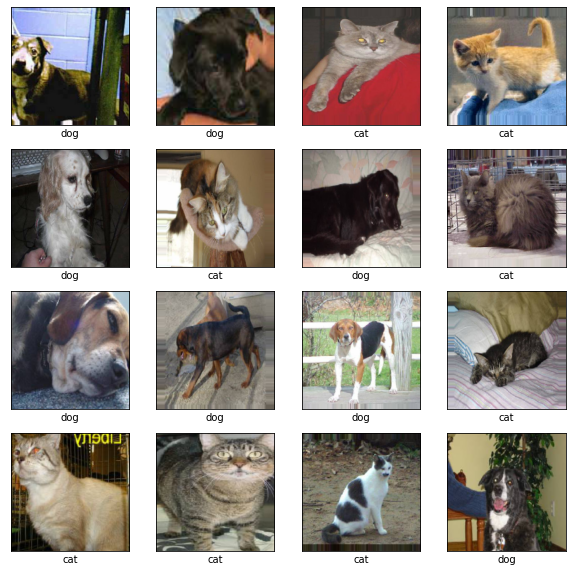

In [14]:
show(batch1)

In [15]:
len(test_set)

63

In [16]:
history = model.fit(
    training_set,
    validation_data=test_set, 
    epochs=5,
    verbose=2)

Epoch 1/5
250/250 - 4216s - loss: 0.2945 - accuracy: 0.8737 - val_loss: 0.2037 - val_accuracy: 0.9120
Epoch 2/5
250/250 - 3820s - loss: 0.1950 - accuracy: 0.9211 - val_loss: 0.1770 - val_accuracy: 0.9275
Epoch 3/5
250/250 - 5099s - loss: 0.1680 - accuracy: 0.9289 - val_loss: 0.1749 - val_accuracy: 0.9295
Epoch 4/5
250/250 - 4373s - loss: 0.1454 - accuracy: 0.9423 - val_loss: 0.1862 - val_accuracy: 0.9290
Epoch 5/5
250/250 - 4815s - loss: 0.1494 - accuracy: 0.9380 - val_loss: 0.1717 - val_accuracy: 0.9300
